In [5]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm

nltk.download('wordnet')

sns.set(style='whitegrid', palette='muted')

[nltk_data] Downloading package wordnet to /Users/jskaf/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
path = os.path.dirname("data/h&mdataset/")

In [11]:
df = pd.read_csv(os.path.join(path,"articles.csv"), encoding='utf-8')
df.tail()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.
105541,959461001,959461,Lounge dress,265,Dress,Garment Full body,1010016,Solid,11,Off White,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,Calf-length dress in ribbed jersey made from a...


In [63]:
print(len(df['product_type_no'].unique()))

132


<Axes: xlabel='colour_group_code', ylabel='colour_group_name'>

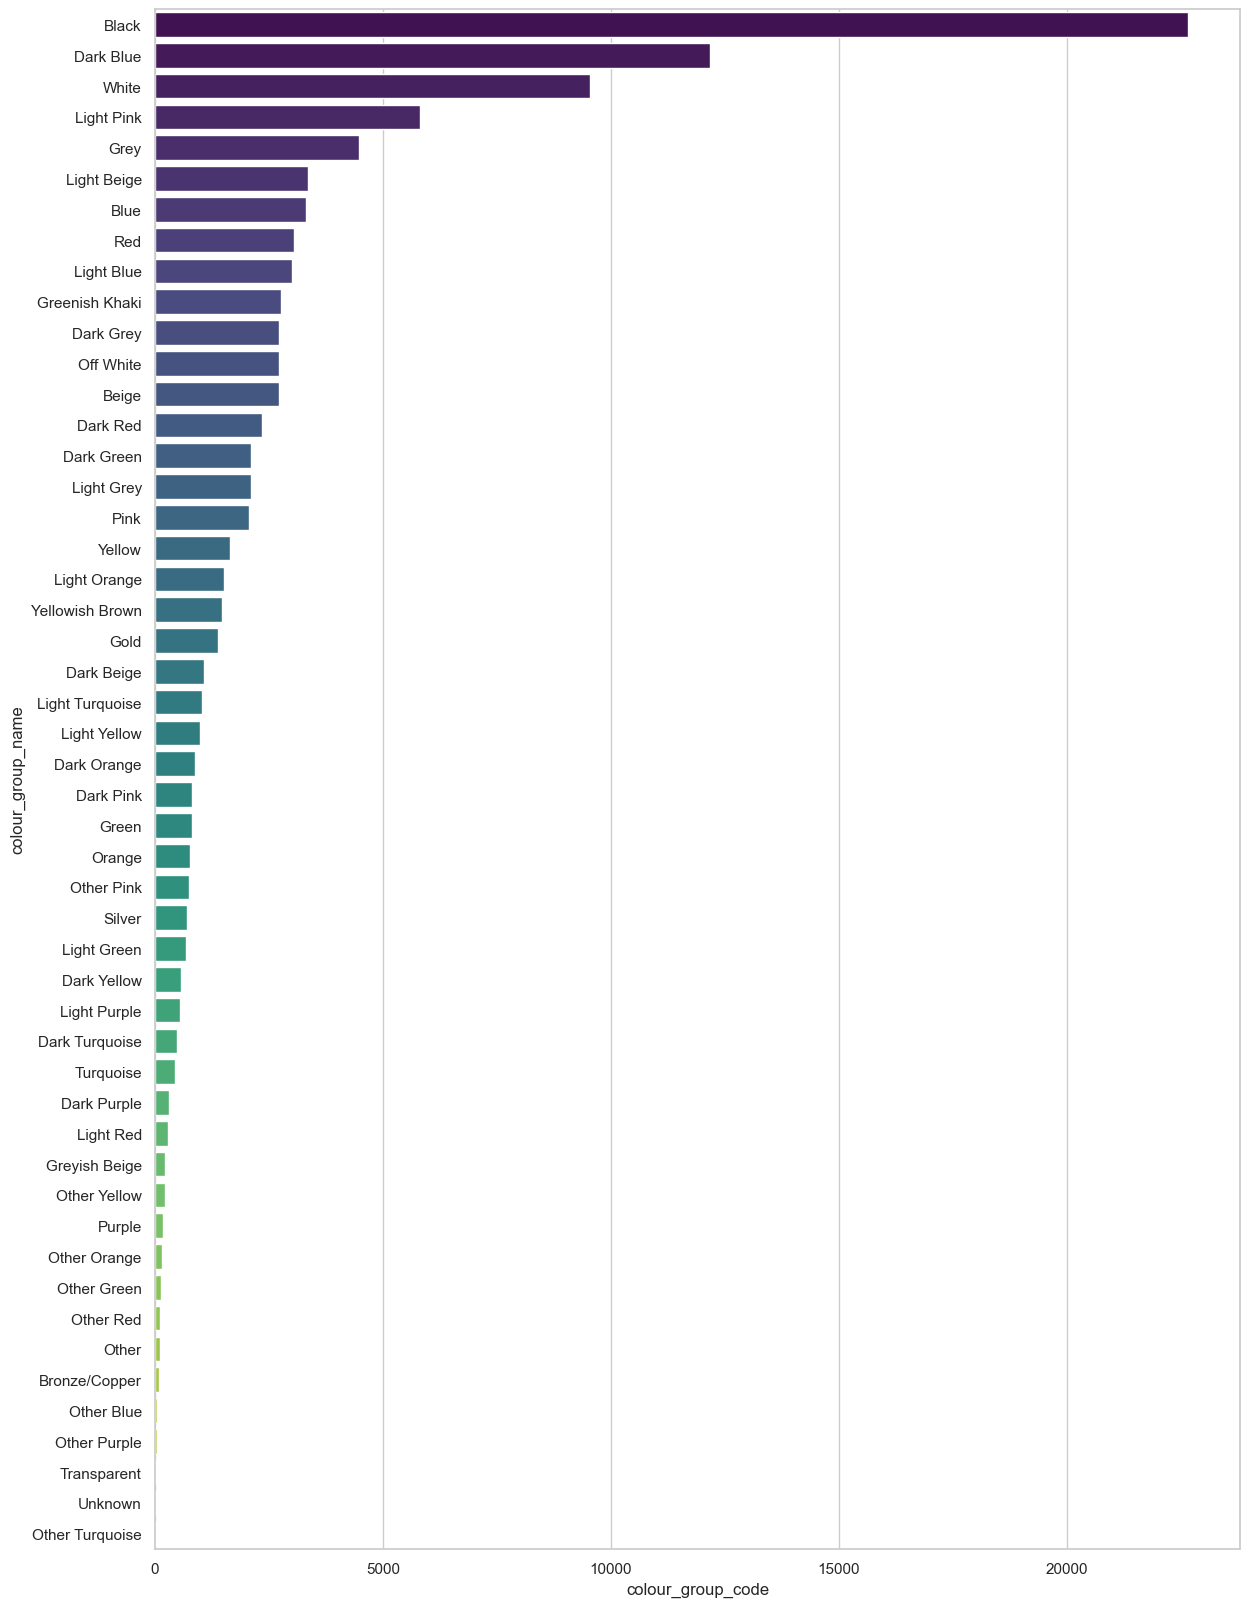

In [64]:
df_color = (df[['colour_group_name','colour_group_code']]
        .dropna()
        .groupby(['colour_group_name'], as_index=False).count()
        .sort_values(by='colour_group_code', ascending=False)

)

plt.figure(figsize=(14,20))
sns.barplot(y='colour_group_name', x='colour_group_code', data=df_color, palette='viridis')

<Axes: xlabel='product_type_no', ylabel='product_type_name'>

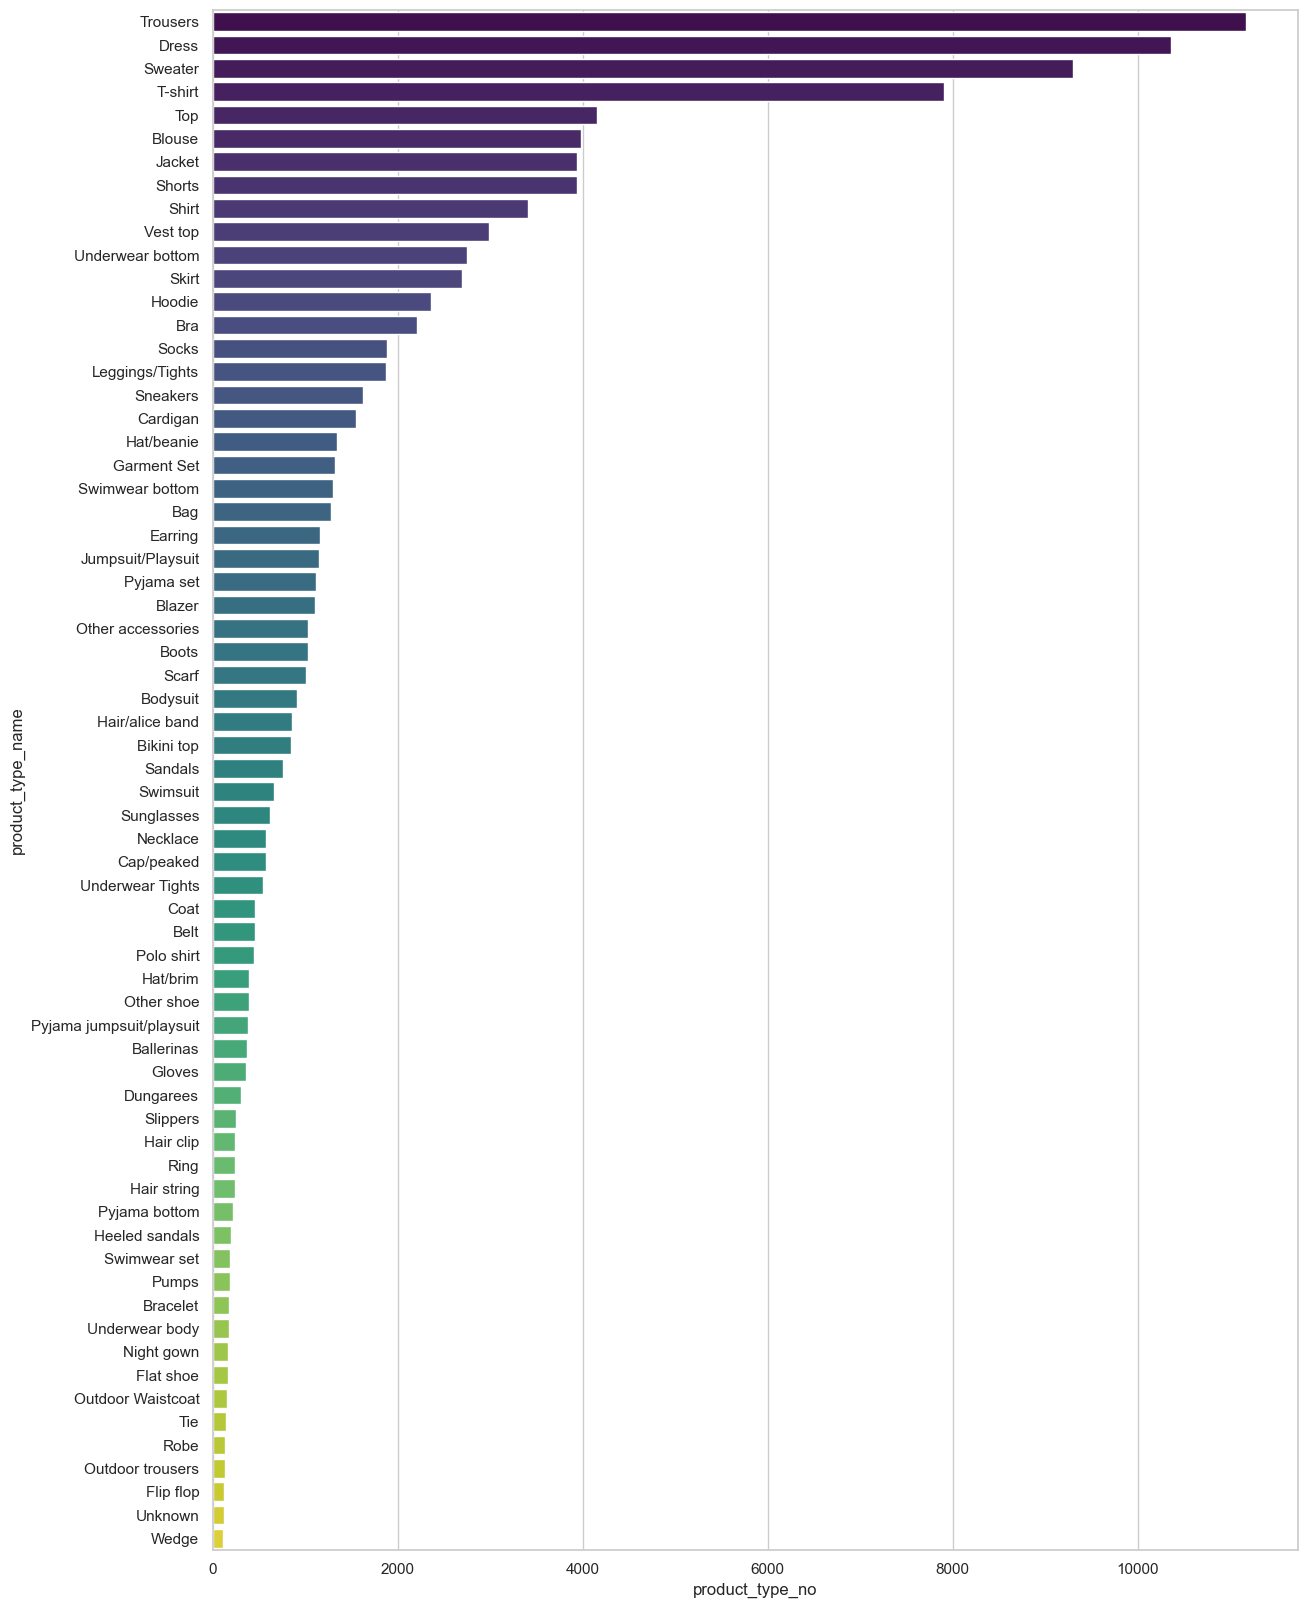

In [65]:
df_product_type = (df[['product_type_name','product_type_no']]
        .dropna()
        .groupby(['product_type_name'], as_index=False).count()
        .sort_values(by='product_type_no', ascending=False)
        #drop rows with number of product type less than 100
        .query('product_type_no > 100')

)
df_product_type

plt.figure(figsize=(14,20))
sns.barplot(x='product_type_no', y='product_type_name', data=df_product_type, palette='viridis')

In [66]:
def preprocess_lemma(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    
    return tokens

In [67]:
df_description = df['detail_desc'].dropna()

In [68]:
# Build frequency dictionaries
entry_texts_freq = Counter()

for entry_text in tqdm(df_description):
    entry_texts_freq.update(preprocess_lemma(entry_text))

100%|██████████| 105126/105126 [00:16<00:00, 6349.02it/s]


(-0.5, 799.5, 399.5, -0.5)

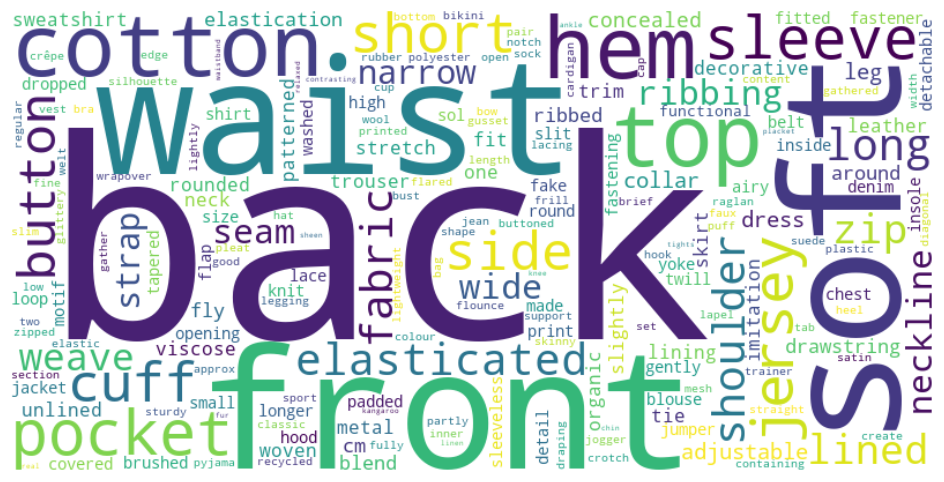

In [69]:
#Do a word cloud for the words in description
wordcloud = WordCloud(width=800, height=400, stopwords=STOPWORDS, background_color='white').generate_from_frequencies(entry_texts_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [70]:
print(df["index_group_name"].unique())

['Ladieswear' 'Baby/Children' 'Menswear' 'Sport' 'Divided']


<Axes: xlabel='index_group_name', ylabel='index_group_no'>

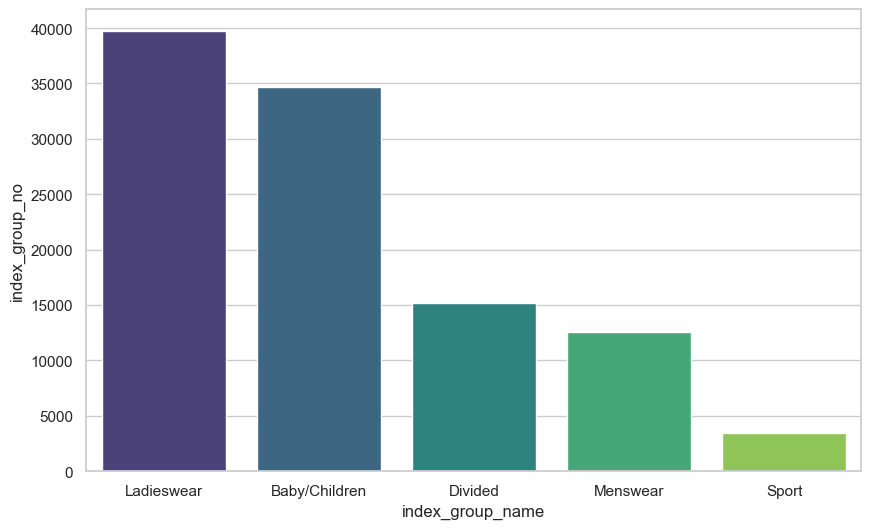

In [71]:
df_index_group = (df[['index_group_name','index_group_no']]
        .dropna()
        .groupby(['index_group_name'], as_index=False).count()
        .sort_values(by='index_group_no', ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(y='index_group_no', x='index_group_name', data=df_index_group, palette='viridis')

In [72]:
print(df["section_name"].unique())

['Womens Everyday Basics' 'Womens Lingerie'
 'Womens Nightwear, Socks & Tigh' 'Baby Essentials & Complements'
 'Men Underwear' 'Mama' 'Womens Small accessories' 'Men H&M Sport'
 'Kids Boy' 'Divided Basics' 'Girls Underwear & Basics' 'Mens Outerwear'
 'Womens Big accessories' 'Divided Accessories'
 'Womens Swimwear, beachwear' 'Divided Selected' 'Boys Underwear & Basics'
 'Contemporary Street' 'Contemporary Casual' 'Men Accessories'
 'Men Suits & Tailoring' 'Womens Everyday Collection' 'Men Shoes'
 'Young Boy' 'H&M+' 'Divided Collection' 'Ladies Denim'
 'Contemporary Smart' 'Womens Trend' 'Kids Outerwear' 'Young Girl'
 'Womens Shoes' 'Womens Tailoring' 'Divided Projects' 'Denim Men'
 'Men Other' 'Womens Jackets' 'Men Other 2' 'Baby Boy' 'Womens Casual'
 'Kids Accessories, Swimwear & D' 'Ladies H&M Sport' 'Kids & Baby Shoes'
 'Baby Girl' 'Kids Girl' 'Divided Complements Other' 'Womens Premium'
 'Special Collections' 'Kids Sports' 'Men Project' 'Men Edition'
 'Collaborations' 'Divided Asi

([<matplotlib.patches.Wedge at 0x2cb1698d0>,
 [Text(-1.0933497885538417, -0.12077350648743189, 'Other'),
  Text(-0.08340197977666823, -1.0968336746149492, 'Womens Everyday Collection'),
  Text(0.7777440345572026, -0.7778908771226752, 'Womens Lingerie'),
  Text(1.0699880301591451, -0.25519720867625634, 'Womens Tailoring'),
  Text(1.0536585648975505, 0.31591712302126695, 'Womens Small accessories'),
  Text(0.7933208322721654, 0.7619987251190115, 'Womens Casual'),
  Text(0.4108735064983791, 1.0203837325524778, 'Womens Trend'),
  Text(-0.01017977365308092, 1.099952895449788, 'H&M+'),
  Text(-0.4010218573206682, 1.024295596959726, 'Mama'),
  Text(-0.7190919939994034, 0.8324101778366013, 'Womens Shoes')],
 [Text(-0.596372611938459, -0.06587645808405375, '25.7%'),
  Text(-0.04549198896909176, -0.5982729134263359, '18.4%'),
  Text(0.42422401884938327, -0.42430411479418645, '9.1%'),
  Text(0.5836298346322609, -0.13919847745977618, '8.5%'),
  Text(0.574722853580482, 0.17231843073887285, '8.2%'),

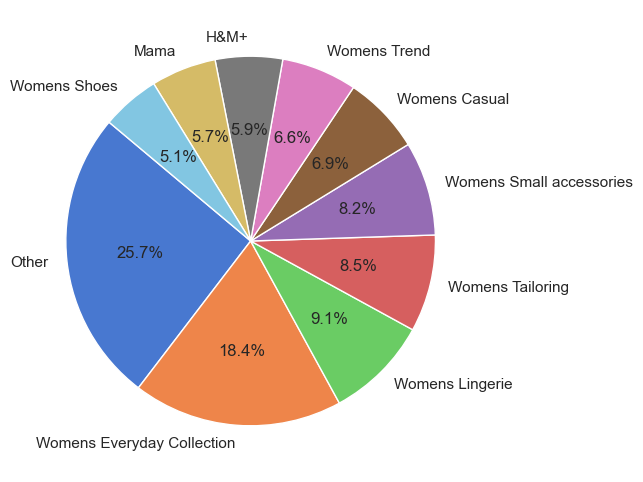

In [73]:
index_group_name = 'Ladieswear' # Select between 'Ladieswear' 'Baby/Children' 'Menswear' 'Sport' 'Divided'

df_section_name = (df[df['index_group_name'] == index_group_name]
        [['section_name','section_no']]
        .dropna()
        .groupby(['section_name'], as_index=False).count()
        .sort_values(by='section_no', ascending=False)
)

plt.figure(figsize=(10,6))
#create pie chart with percentage and regroup in other if less than 5%

df_section_name['percentage'] = (df_section_name['section_no'] / df_section_name['section_no'].sum()) * 100
df_section_name['percentage'] = df_section_name['percentage'].round(2)

df_section_name['section_name'] = df_section_name.apply(lambda x: x['section_name'] if x['percentage'] > 5 else 'Other', axis=1)

df_section_name = (df_section_name
        .groupby(['section_name'], as_index=False).sum()
        .sort_values(by='section_no', ascending=False)
)

plt.pie(df_section_name['section_no'], labels=df_section_name['section_name'], autopct='%1.1f%%', startangle=140)


In [74]:
print(df["graphical_appearance_name"].unique())

['Solid' 'Stripe' 'All over pattern' 'Melange' 'Transparent' 'Metallic'
 'Application/3D' 'Denim' 'Colour blocking' 'Dot' 'Other structure'
 'Contrast' 'Treatment' 'Check' 'Chambray' 'Front print'
 'Glittering/Metallic' 'Mixed solid/pattern' 'Placement print'
 'Other pattern' 'Neps' 'Embroidery' 'Lace' 'Jacquard' 'Unknown' 'Argyle'
 'Slub' 'Mesh' 'Sequin' 'Hologram']


<Axes: xlabel='graphical_appearance_no', ylabel='graphical_appearance_name'>

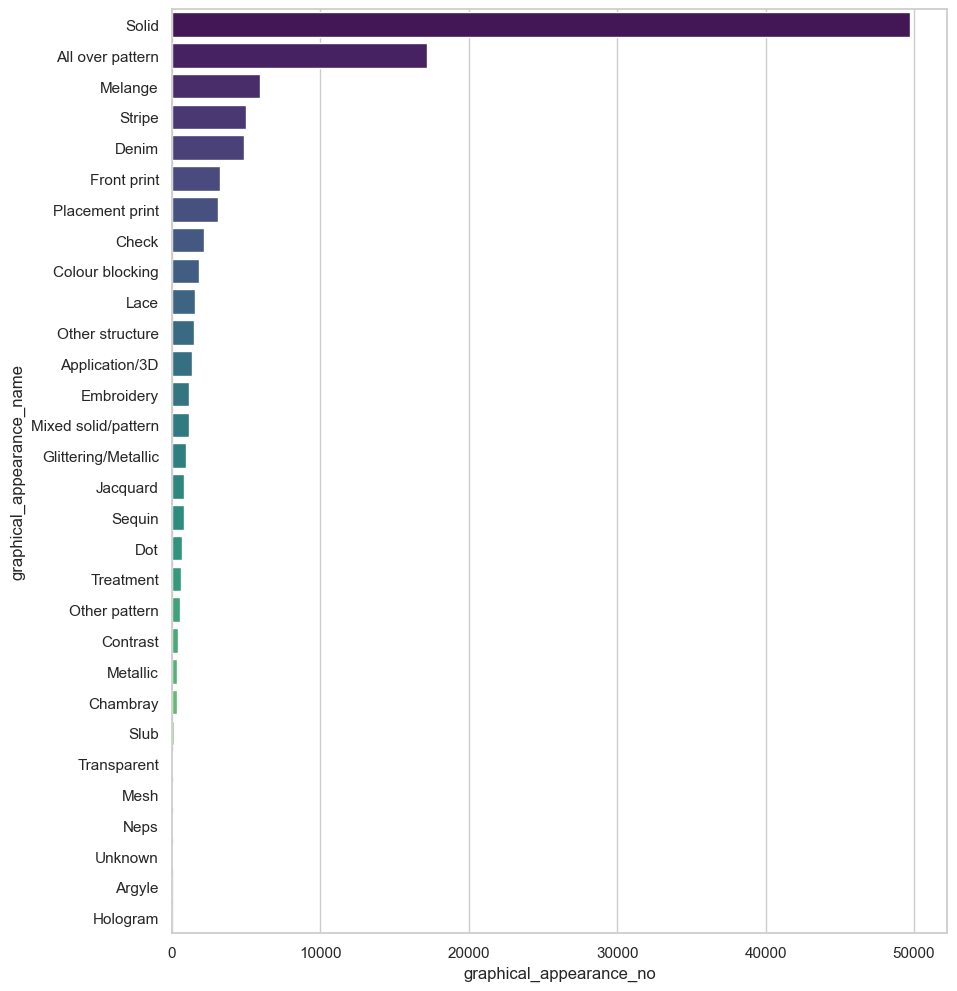

In [76]:
df_graphical_appearance = (df[['graphical_appearance_name','graphical_appearance_no']]
        .dropna()
        .groupby(['graphical_appearance_name'], as_index=False).count()
        .sort_values(by='graphical_appearance_no', ascending=False)
        
)

plt.figure(figsize=(10,12))
sns.barplot(x='graphical_appearance_no', y='graphical_appearance_name', data=df_graphical_appearance, palette='viridis')
